In [1]:
# --- Load Agents --- #
from agents.agent_reinforce.agent import REINFORCEAgent
from agents.agent_deepqn.agent import DeepQAgent
from agents.agent_ddpg.agent import DDPG_Agent

# --- Load Environments --- #
from environment.grid import GridEnv

# --- Load Necessary --- #
from collections import deque
import numpy as np
from utilities.helper import flatten


# --- Load Training --- #
from experiments.experiment import Experiment

%load_ext autoreload
%autoreload 2


/Users/mark/Dev/multi-drl/agents/agent_ddpg/agent.py:116: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if self.output_type is 'probs':
/Users/mark/Dev/multi-drl/agents/agent_ddpg/agent.py:124: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif self.output_type is 'vectors':
/Users/mark/Dev/multi-drl/agents/agent_ddpg/agent.py:131: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if self.output_type is 'probs':
/Users/mark/Dev/multi-drl/agents/agent_ddpg/agent.py:133: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif self.output_type is 'vectors':


# Generalized

In [2]:
environments = [GridEnv(num_agent = 2, agents_start = [(1,1)], goals_start=[(7,7)]), GridEnv(num_agent = 2)]
wrapped_agents = [[DeepQAgent(env.state_space, env.action_space.n) for n in range(env.num_agent)] for env in environments]
# wrapped_agents = [[DeepQAgent(env.state_space, env.action_space.n, dddpqagent_config) for n in range(env.num_agent)] for env in environments]

# dddpqagent_config=[{}, ]
# print(environments)
# print(wrapped_agents)


Not all _agents_ have fixed starting positions, rest (1) will be random
Not all _goals_ have fixed starting positions, rest (1) will be random
Not all _agents_ have fixed starting positions, rest (2) will be random
Not all _goals_ have fixed starting positions, rest (2) will be random


In [3]:
ddpg_experiments=[Experiment("Test Experiment", env, agents, max_t=100, num_episodes=300) for agents, env in zip(wrapped_agents, environments)]

# dqn_experiments=[Experiment("Test Experiment", env, agents, max_t=100, num_episodes=300) for agents, env in zip(wrapped_agents, environments)]

# reinforce_experiments=[Experiment("Reinforce Experiment", env, agents, max_t=100, num_episodes=300) for agents, env in zip(wrapped_agents, environments)]

# print(experiments)

 Total score (averaged over agents) 299 episode: -100.0 | 	Avarage in last 100 is -104.385Directory doesn't exist, going to create one first
Scores saved!


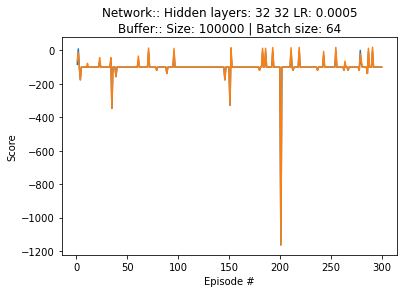

 Total score (averaged over agents) 299 episode: -100.0 | 	Avarage in last 100 is -89.615Scores saved!


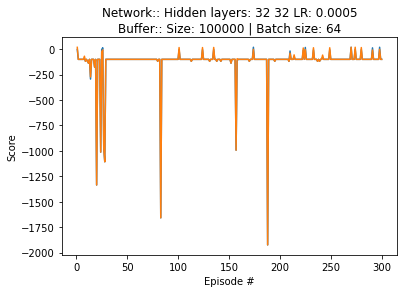

In [4]:
for experiment in ddpg_experiments:
    score_history, state_history = experiment.run()
    experiment.save(score_history, state_history)

# Experiments with config files

In [8]:
from experiments.experiment_list import exp_config_ddpg, exp_config_ppo, exp_config_dqn 
from agents.agent_ddpg.config import DDPG_AgentConfig


In [11]:
ddpg_experiments = []
for i, config in enumerate(exp_config_ddpg):
    """
    order of config: num_agent, grid_size, agents_start, goals_start, prob_right_direction, actor_critic 
    init environment: num_agent = 2, grid_size = 8, prob_right_direction = 1, agents_start = [], goals_start=[], render_board = False
    init of ddpg: state_size, action_size, seed=1, config=DDPG_AgentConfig()
    """

    env = GridEnv(num_agent = config[0], grid_size = config[1], agents_start = [config[2] for _ in range(config[0])], goals_start= [config[3] for _ in range(config[0])], prob_right_direction = config[4], render_board = False)
    agent_config = DDPG_AgentConfig(ACTOR_H=config[5], CRITIC_H=config[5])
    agents = [DDPG_Agent(env.state_space, env.action_space.n, seed=1, config=agent_config) for _ in range(env.num_agent)]

    ddpg_experiments.append(Experiment(name="DDPG Exp {}".format(i), environment= env, agents=agents, max_t=1, num_episodes=1, goal = 0.))

print(len(ddpg_experiments))

1080


In [12]:
for experiment in ddpg_experiments:
    score_history, state_history = experiment.run()
    experiment.save(score_history, state_history, display = False)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x0 and 4x16)